# Open-world Experiments - Multi-Class Classification with k-NN
- Classify 95 monitored website traces with unique labels against additional unmonitored websites.

- Monitored website instances labed with {0, 1, 2, ..., 94} and the unmonitored website instances with the label '-1'.

In [194]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read CSV file

In [195]:
df_unmon = pd.read_csv("/content/drive/MyDrive/Machine Learning/팀 과제/unmon2.csv", header=None)

In [196]:
# transpose data
df_unmon = df_unmon.transpose()
df_unmon.rename(columns=df_unmon.iloc[0],inplace=True)
df_unmon = df_unmon.drop(df_unmon.index[0])
df_unmon

,total_pkt_per_user,total_outgoing_pkt_per_user,total_incoming_pkt_per_user,outgoing_pkt_frac_per_user,incoming_pkt_frac_per_user,outgoing30_per_user,incoming30_per_user,avg_total_burst_per_user,std_total_burst_per_user,max_total_burst_per_user,...,avg_sum_intervals_continuous,std_sum_intervals_continuous,max_sum_intervals_continuous,avg_outgoing_pkts_time_interval,std_outgoing_pkts_time_interval,max_outgoing_pkts_time_interval,avg_incoming_pkts_time_interval,std_incoming_pkts_time_interval,max_incoming_pkts_time_interval,flow_act_duration
1,1421.0,121.0,1300.0,0.0852,0.9148,21.0,9.0,9.1548,14.3739,66.0,...,0.0831,0.1328,0.92,0.0897,0.149,0.92,0.0766,0.1141,0.58,10.14
2,518.0,80.0,438.0,0.1544,0.8456,22.0,8.0,5.5484,9.492,50.0,...,0.1254,0.4038,3.59,0.0805,0.107,0.34,0.1715,0.5606,3.59,10.16
3,1358.0,118.0,1240.0,0.0869,0.9131,23.0,7.0,8.9801,13.9082,50.0,...,0.0934,0.2154,1.77,0.0732,0.0977,0.45,0.1139,0.2881,1.77,11.11
4,1446.0,122.0,1324.0,0.0844,0.9156,21.0,9.0,9.0881,14.3704,70.0,...,0.1086,0.1494,0.58,0.0926,0.14,0.51,0.1249,0.1568,0.58,13.36
5,1406.0,115.0,1291.0,0.0818,0.9182,22.0,8.0,8.949,13.5936,60.0,...,0.0917,0.1259,0.49,0.1091,0.1428,0.49,0.0743,0.1033,0.37,10.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28996,4593.0,413.0,4180.0,0.0899,0.9101,20.0,10.0,8.998,13.7488,69.0,...,0.0775,0.5766,11.57,0.0496,0.1286,1.6,0.0496,0.1286,1.6,32.09
28997,5110.0,447.0,4663.0,0.0875,0.9125,19.0,11.0,11.3884,16.4356,87.0,...,0.0862,0.6327,12.92,0.0588,0.2211,2.9,0.0588,0.2211,2.9,38.62
28998,361.0,59.0,302.0,0.1634,0.8366,19.0,11.0,6.4364,9.7603,41.0,...,0.5822,3.2194,25.0,0.2423,0.671,3.3,0.2423,0.671,3.3,34.93
28999,509.0,96.0,413.0,0.1886,0.8114,21.0,9.0,4.5766,7.6554,42.0,...,0.1221,0.1938,1.53,0.0869,0.0994,0.33,0.0869,0.0994,0.33,11.84


Check if there is any null value in data

In [197]:
print('\nNull Values in data \n{}'.format(df_unmon.isnull().sum()))
print('\nDuplicated values in data {}'.format(df_unmon.duplicated().sum()))


Null Values in data 
total_pkt_per_user                 0
total_outgoing_pkt_per_user        0
total_incoming_pkt_per_user        0
outgoing_pkt_frac_per_user         0
incoming_pkt_frac_per_user         0
outgoing30_per_user                0
incoming30_per_user                0
avg_total_burst_per_user           0
std_total_burst_per_user           0
max_total_burst_per_user           0
avg_incoming_burst_per_user        0
std_incoming_burst_per_user        0
min_incoming_burst_per_user        0
avg_outgoing_burst_per_user        0
std_outgoing_burst_per_user        0
max_outgoing_burst_per_user        0
avg_cumulative                     0
std_cumulative                     0
min_cumulative                     0
avg_interval                       0
std_interval                       0
max_interval                       0
avg_pkts_in_fixed_time             0
std_pkts_in_fixed_time             0
min_pkts_in_fixed_time             0
max_pkts_in_fixed_time             0
avg_sum_interval

Extract data X and label y

In [198]:
import numpy as np

# data X
X = np.array(df_unmon.iloc[:, 1:])

# label y
y = np.repeat(np.arange(95), 200) # add 0 ~ 94, 200 times each
y = np.append(y, np.full(10000, -1))  # add 10000 -1's

print(X)
print(y)

[[121.0 1300.0 0.0852 ... 0.1141 0.58 10.14]
 [80.0 438.0 0.1544 ... 0.5606 3.59 10.16]
 [118.0 1240.0 0.0869 ... 0.2881 1.77 11.11]
 ...
 [59.0 302.0 0.1634 ... 0.671 3.3 34.93]
 [96.0 413.0 0.1886 ... 0.0994 0.33 11.84]
 [322.0 9668.0 0.0322 ... 0.0571 0.49 9.62]]
[ 0  0  0 ... -1 -1 -1]


# Extract feature importance by using decision tree classifier

In [199]:
from sklearn.tree import DecisionTreeClassifier

# build decision tree
model = DecisionTreeClassifier()
model.fit(X, y)  # X: input data, y: label

# Feature importance
importance = model.feature_importances_

# result
for i, v in enumerate(importance):
    print(f'Feature {i}: {v}')

Feature 0: 0.06756555429216231
Feature 1: 0.03418770865809063
Feature 2: 0.02836864994038042
Feature 3: 0.023425964854539957
Feature 4: 0.021684538043529024
Feature 5: 0.02094669509707478
Feature 6: 0.022600992368282946
Feature 7: 0.015904110695088052
Feature 8: 0.007174122529368999
Feature 9: 0.029019666225986444
Feature 10: 0.012474463465275781
Feature 11: 0.009578784984096273
Feature 12: 0.03000930403004525
Feature 13: 0.03975006229185823
Feature 14: 0.026226472569768285
Feature 15: 0.04424617448507304
Feature 16: 0.30439976796470825
Feature 17: 0.029064166046314392
Feature 18: 0.011213101440871944
Feature 19: 0.02430842923798691
Feature 20: 0.02740326579970846
Feature 21: 0.020590518887581302
Feature 22: 0.012106840864428385
Feature 23: 0.0014802731804991422
Feature 24: 0.009126614643803793
Feature 25: 0.01597981646240557
Feature 26: 0.01856784941086573
Feature 27: 0.022798365029992617
Feature 28: 0.007323199542732579
Feature 29: 0.005353282863022292
Feature 30: 0.00981531571299234

Visualize feature importance

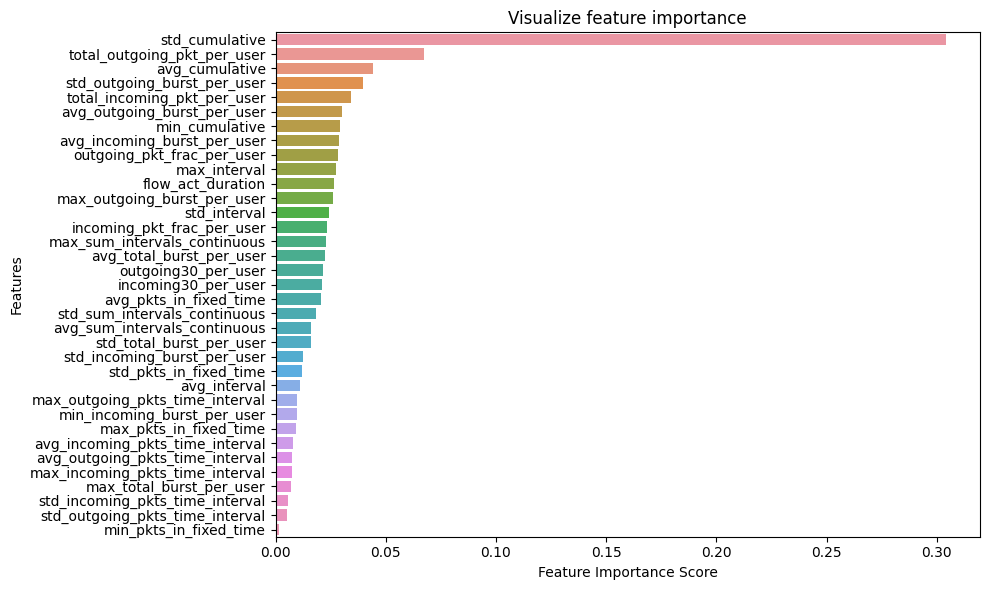

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_imp = pd.Series(importance, index=df_unmon.iloc[:, 1:].columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualize feature importance")
plt.tight_layout()

# 1. Build and run k-NN model with all features

## 1-1. Default k-NN with k=5

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time
import math

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define k-NN with k=5
model_knn = KNeighborsClassifier(n_neighbors= 5)
model_knn.fit(X_train, y_train)

# test k-NN
start_time = time.time()
pred = model_knn.predict(X_test)
print('Accuracy: %0.3f' %accuracy_score(y_test, pred))
print('Time to elapse: %0.3f' %(time.time() - start_time))

Accuracy: 0.718
Time to elapse: 1.126


## 1-2. k-NN with GridSearch

In [202]:
param_grid = {'n_neighbors': [3, 5, 7], 'metric' : ['euclidean', 'manhattan', 'minkowski']} # search space
grid_search_knn = GridSearchCV(model_knn, param_grid, cv=5)  # 5-fold cross validation
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7]})

In [203]:
print('Best accuracy : %0.3f' %grid_search_knn.best_score_)
print("Best parameters:", grid_search_knn.best_params_)

Best accuracy : 0.754
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}


In [204]:
print("testing accuracy: %0.3f" %accuracy_score(y_test, grid_search_knn.best_estimator_.predict(X_test)))

testing accuracy: 0.763


After k-NN with grid search, we found that k-NN model with manhattan metric and 5 neighbors is the best with the accuracy of 0.763

## 1-3. PCA + K-NN with GridSearch

In [205]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, StratifiedKFold

pipe = Pipeline([('pca', PCA()),('clf', KNeighborsClassifier()),])

parameters = {'pca__n_components' : [2, 5, 10],'clf__n_neighbors' : [3, 5, 7]}

kf = StratifiedKFold(n_splits=5, shuffle= True, random_state= 13)
grid_search_pca_knn = GridSearchCV(pipe, parameters, cv = kf, n_jobs= -1, verbose=1)
grid_search_pca_knn.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=13, shuffle=True),
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('clf', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'clf__n_neighbors': [3, 5, 7],
                         'pca__n_components': [2, 5, 10]},
             verbose=1)

In [206]:
print('Best accuracy : %0.3f' %grid_search_pca_knn.best_score_)
print('Best parameters:')
best_parameters = grid_search_pca_knn.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print('\t%s: %r'%(param_name, best_parameters[param_name]))

Best accuracy : 0.682
Best parameters:
	clf__n_neighbors: 5
	pca__n_components: 10


In [207]:
start_time = time.time()
print("testing accuracy: %0.3f" %accuracy_score(y_test, grid_search_pca_knn.best_estimator_.predict(X_test)))
print('Time to elapse : %0.3f' %(time.time() - start_time))

testing accuracy: 0.688
Time to elapse : 0.960


# 2. Build and run k-NN model with 5 important features

Extract 5 important features

In [213]:
df_unmon = df_unmon[['std_cumulative', 'total_outgoing_pkt_per_user', 'avg_cumulative', 'std_outgoing_burst_per_user', 'min_cumulative']]
X = np.array(df_unmon.iloc[:, 1:])

## 2-1. Default k-NN with k=5

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time
import math

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define k-NN with k=5
model_knn = KNeighborsClassifier(n_neighbors= 5)
model_knn.fit(X_train, y_train)

# test k-NN
start_time = time.time()
pred = model_knn.predict(X_test)
print('Accuracy: %0.3f' %accuracy_score(y_test, pred))
print('Time to elapse: %0.3f' %(time.time() - start_time))

Accuracy: 0.684
Time to elapse: 0.314


## 2-2. k-NN with GridSearch

In [215]:
param_grid = {'n_neighbors': [3, 5, 7], 'metric' : ['euclidean', 'manhattan', 'minkowski']} # search space
grid_search_knn = GridSearchCV(model_knn, param_grid, cv=5)  # 5-fold cross validation
grid_search_knn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7]})

In [216]:
print('Best accuracy : %0.3f' %grid_search_knn.best_score_)
print("Best parameters:", grid_search_knn.best_params_)

Best accuracy : 0.697
Best parameters: {'metric': 'manhattan', 'n_neighbors': 5}


In [217]:
print("testing accuracy: %0.3f" %accuracy_score(y_test, grid_search_knn.best_estimator_.predict(X_test)))

testing accuracy: 0.700
